<a href="https://colab.research.google.com/github/Jonathan02JO/Mini-project/blob/main/Classfication%20of%20image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%mkdir Classification_Images
!pip install bing_image_downloader
from bing_image_downloader import downloader
downloader.download("dolphins",limit=30, output_dir="Classification_Images",adult_filter_off=True)
from bing_image_downloader import downloader
downloader.download("red roses",limit=30, output_dir="Classification_Images",adult_filter_off=True)
from bing_image_downloader import downloader
downloader.download("Cricket bat",limit=30, output_dir="Classification_Images",adult_filter_off=True)

[%] Downloading Images to /content/Classification_Images/dolphins


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://img1.grunge.com/img/gallery/false-facts-about-dolphins-you-always-thought-were-true/intro-1500661774.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/a7/67/3d/a7673d9e408ed199dff1290a8d3cc6b6.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://2.bp.blogspot.com/-zpgDUk2iiLw/TlJxAwop8XI/AAAAAAAAAOE/XsSgGyYrRIw/s1600/Flippeddolphinsmile.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.rd.com/wp-content/uploads/2019/03/hector-dolphin.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.storytrender.com/wp-content/uploads/2018/10/4_CATERS_DIRTY_DANCING_DOLPHINS_05-1024x683.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://4.bp.blogspot.com/-Ji10i7JwvE4/TnPA78Fw3MI/AAAAAAAAAI0/XZmMcrOPjb8/s1600/dolphin3.jpg
[%] File Downloaded !

[

In [2]:
import shutil
shutil.make_archive('Classification_Images', 'zip', 'Classification_Images')
!pip freeze > requirements.txt

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray

target = []
flat_data = []
images = []
DataDirectory = '/content/Classification_Images'

Categories = ["dolphins","red roses","Cricket bat"]

for i in Categories:
  print("Category is:",i,"\tLabel encoded as:",Categories.index(i))
  target_class = Categories.index(i)
  path = os.path.join(DataDirectory,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(target_class)
flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)

Category is: dolphins 	Label encoded as: 0
Category is: red roses 	Label encoded as: 1
Category is: Cricket bat 	Label encoded as: 2


In [4]:
df = pd.DataFrame(flat_data)
df['Target'] = target

from sklearn.model_selection import train_test_split
x = df.iloc[:,:-1].values
y = target
print("Input data dimensions:",x.shape)
print("Output data dimensions:",y.shape)
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size = 0.3,random_state=109,stratify=y)
print("Dimensions of input training data:",x_train.shape)
print("Dimensions of input testing data:",x_test.shape)
print("Dimensions of output training data:",y_train.shape)
print("Dimensions of output testing data:",y_test.shape)

Input data dimensions: (90, 67500)
Output data dimensions: (90,)
Dimensions of input training data: (63, 67500)
Dimensions of input testing data: (27, 67500)
Dimensions of output training data: (63,)
Dimensions of output testing data: (27,)


In [5]:
print("Labels\t\t   Image index considered")
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

Labels		   Image index considered
(array([0, 1, 2]), array([21, 21, 21]))
(array([0, 1, 2]), array([9, 9, 9]))


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

cv = GridSearchCV(SVC(), tuned_parameters, refit = True,verbose= 3) 
cv.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.846, total=   0.5s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.615, total=   0.5s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.769, total=   0.5s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.833, total=   0.5s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.917, total=   0.5s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=1.000, total=   0.4s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=1.000, total=   0.4s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.923, total=   0.4s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=1.000, total=   0.4s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   18.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [7]:
print("Best parameters to apply are:",cv.best_params_)
svm = cv.best_estimator_
print("Model after tuning is:\n",svm)
y_prediction = svm.predict(x_test)
print("Expected results: ",y_test)
print("Predicted results:",y_prediction)

Best parameters to apply are: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
Model after tuning is:
 SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Expected results:  [1 2 1 0 1 0 0 0 0 1 1 0 0 2 1 2 2 0 1 1 1 0 2 2 2 2 2]
Predicted results: [1 2 1 0 1 0 0 0 0 1 1 0 0 2 1 2 2 0 1 1 1 0 2 2 1 2 2]


In [8]:
print("Best parameters to apply are:",cv.best_params_)
svm = cv.best_estimator_
print("Model after tuning is:\n",svm)
y_prediction = svm.predict(x_test)
print("Expected results: ",y_test)
print("Predicted results:",y_prediction)

Best parameters to apply are: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
Model after tuning is:
 SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Expected results:  [1 2 1 0 1 0 0 0 0 1 1 0 0 2 1 2 2 0 1 1 1 0 2 2 2 2 2]
Predicted results: [1 2 1 0 1 0 0 0 0 1 1 0 0 2 1 2 2 0 1 1 1 0 2 2 1 2 2]


In [9]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print("Confusion matrix results:\n",confusion_matrix(y_prediction,y_test))
print("\nClassification report of model:\n",classification_report(y_prediction,y_test))
print("Accuracy score:",100*accuracy_score(y_prediction,y_test))

Confusion matrix results:
 [[9 0 0]
 [0 9 1]
 [0 0 8]]

Classification report of model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.90      0.95        10
           2       0.89      1.00      0.94         8

    accuracy                           0.96        27
   macro avg       0.96      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27

Accuracy score: 96.29629629629629


In [10]:
import pickle
pickle.dump(svm,open("Classification_Model.p","wb"))

test_model = pickle.load(open("Classification_Model.p","rb"))

Enter url of image to test: https://th.bing.com/th/id/OIP.fZGrB9nJHkZWZdCwU1MD7gHaEK?w=331&h=186&c=7&o=5&dpr=1.25&pid=1.7
Dimensions of original image are: (232, 413, 3)
PREDICTED OUTPUT IS: red roses


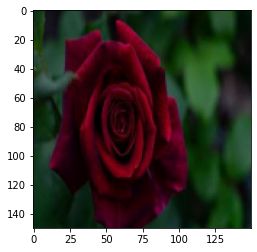

In [11]:
flat_data = []
url = input ('Enter url of image to test: ')
img_array = imread(url)
img_resized = resize(img_array,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print("Dimensions of original image are:",img_array.shape)
plt.imshow(img_resized)
y_output = test_model.predict(flat_data)
y_output = Categories[y_output[0]]
print("PREDICTED OUTPUT IS:",y_output)